In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as plto
import plotly.graph_objs as gobj

In [20]:
df = pd.read_csv('C:/Users/mahak/Downloads/athlete_events.csv',encoding = "utf-8")
print(df.shape)
df.head()
df.info()

(271116, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [21]:
filter_data = df.dropna()
filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 40 to 271103
Data columns (total 15 columns):
ID        30181 non-null int64
Name      30181 non-null object
Sex       30181 non-null object
Age       30181 non-null float64
Height    30181 non-null float64
Weight    30181 non-null float64
Team      30181 non-null object
NOC       30181 non-null object
Games     30181 non-null object
Year      30181 non-null int64
Season    30181 non-null object
City      30181 non-null object
Sport     30181 non-null object
Event     30181 non-null object
Medal     30181 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 3.7+ MB


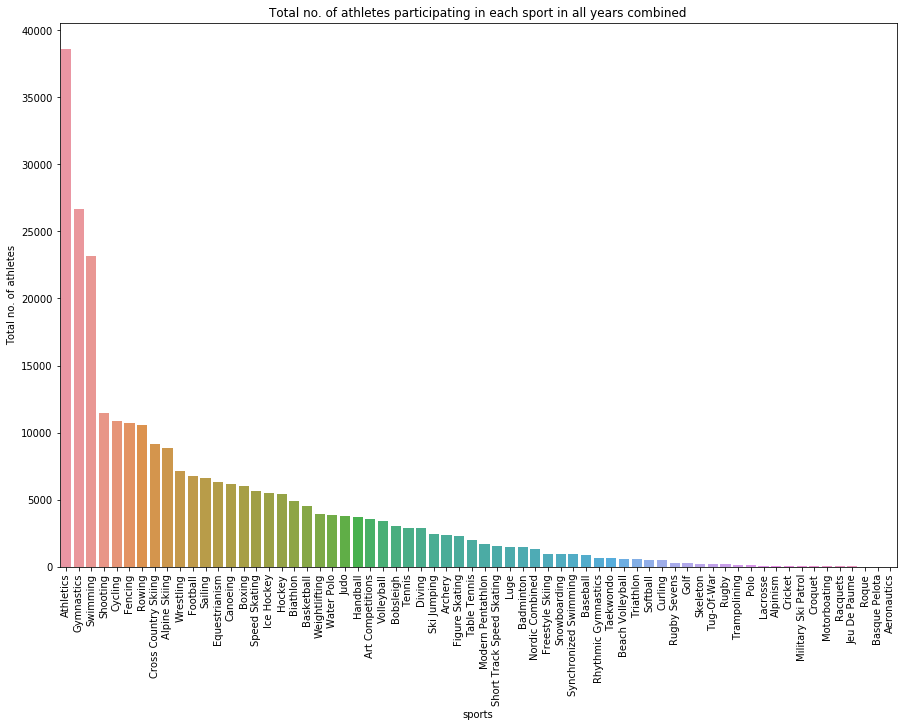

In [22]:
sport=list(df.Sport.unique())

ath_no=[]
for i in sport:
    an=df[df.Sport==i]
    bn=len(an)
    ath_no.append(bn)

data=pd.DataFrame({"sports":sport,"NOA":ath_no})
sorted_data=data.sort_values("NOA",ascending=False)

plt.figure(figsize=(15,10)) 
sns.barplot(x=sorted_data.sports,y=sorted_data.NOA)
plt.xticks(rotation=90)
plt.ylabel("All the sports played in Olympics")
plt.ylabel("Total no. of athletes")
plt.title("Total no. of athletes participating in each sport in all years combined")
plt.show()

Text(0.5,1,'Top 10 countries by total no. of medal')

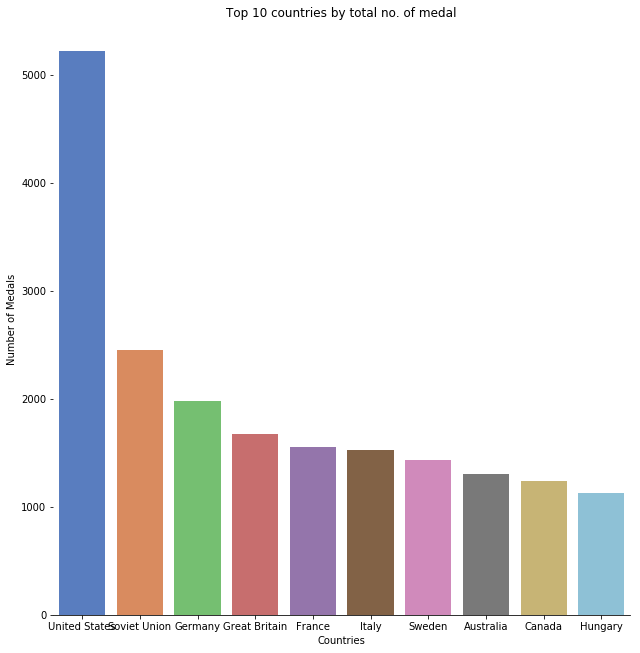

In [23]:
tMedal = df[(df.Medal == 'Gold') | (df.Medal == 'Silver') | (df.Medal == 'Bronze')]
Total_Medal = tMedal.Team.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=Total_Medal,
                height=9, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Countries")
g.set_ylabels("Number of Medals")
plt.title('Top 10 countries by total no. of medal')

Text(0.5,1,'Top 10 countries by gold medals won')

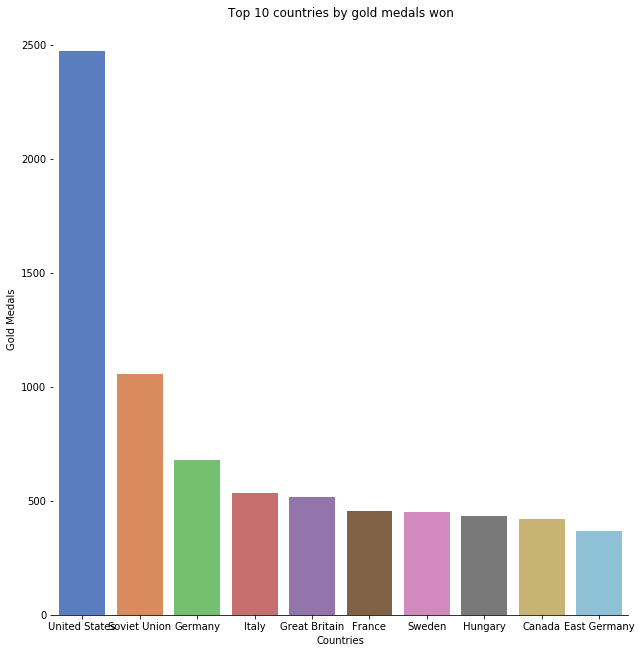

In [24]:
tgMedal = df[(df.Medal == 'Gold') ]
Total_GMedal = tgMedal.Team.value_counts().reset_index(name='Medal').head(10)
gol = sns.catplot(x="index", y="Medal", data=Total_GMedal,
                height=9, kind="bar", palette="muted")
gol.despine(left=True)
gol.set_xlabels("Countries")
gol.set_ylabels("Gold Medals")
plt.title('Top 10 countries by gold medals won')

In [25]:
medal_df = df.groupby(by=['Medal', 'NOC']).size()
goldfigure = gobj.Figure([
          gobj.Choropleth(locations=medal_df.loc['Gold'].index,
                 z=medal_df.loc['Gold'].values, colorscale='YlOrRd',
                 geo='geo3', showscale=False, name='Gold Medals',
                 reversescale=True),
          ])
goldfigure.layout.update(
        height=500,
        title='Gold Medals for all countries',
        paper_bgcolor='#212121',
        font=dict(color='#FFFFFF'),
        geo3=dict(bgcolor='#212121'),
    )
plto.plot(goldfigure, filename='C:/Users/mahak/Downloads/medalsbycountry.html')

'C:/Users/mahak/Downloads/medalsbycountry.html'

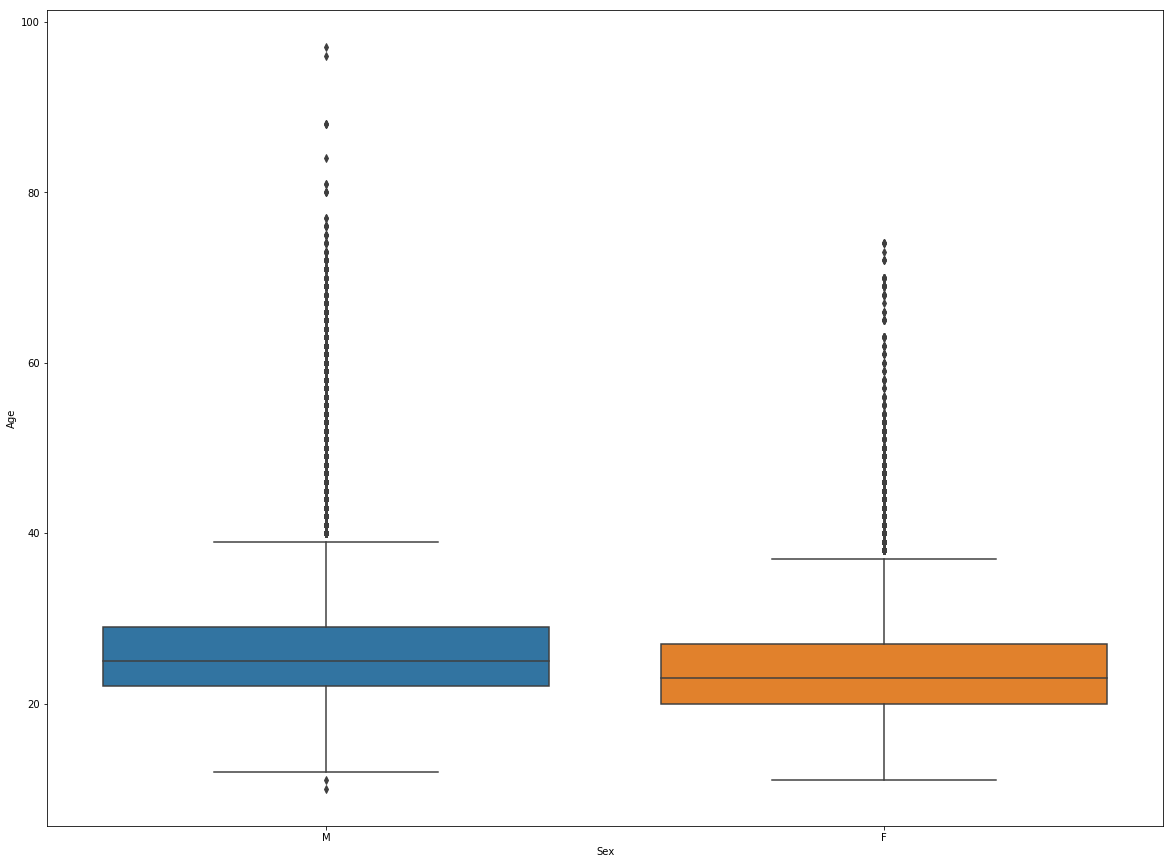

In [26]:
plt.figure(figsize=(20,15))
sns.boxplot(x=df.Sex,y=df.Age)
plt.show()

Text(0.5,1,'Male Athletes age over the years for Summer Olympics')

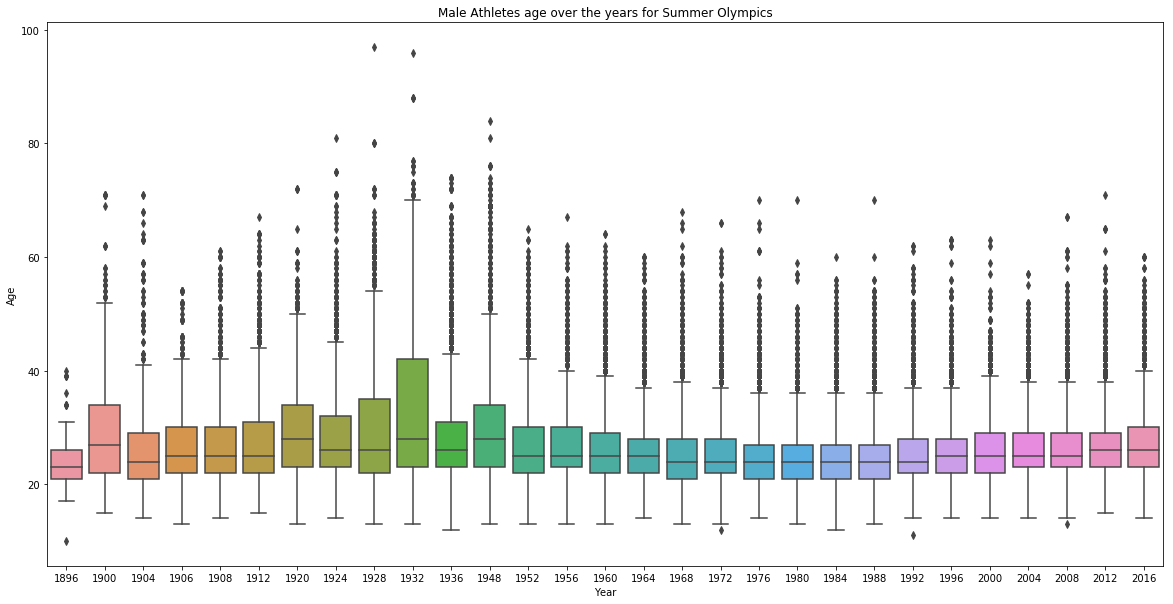

In [27]:
MenVsYear = df[(df.Sex == 'M') & (df.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=MenVsYear)
plt.title('Male Athletes age over the years for Summer Olympics')

Text(0.5,1,'Female Athletes age over the years for Summer Olympics')

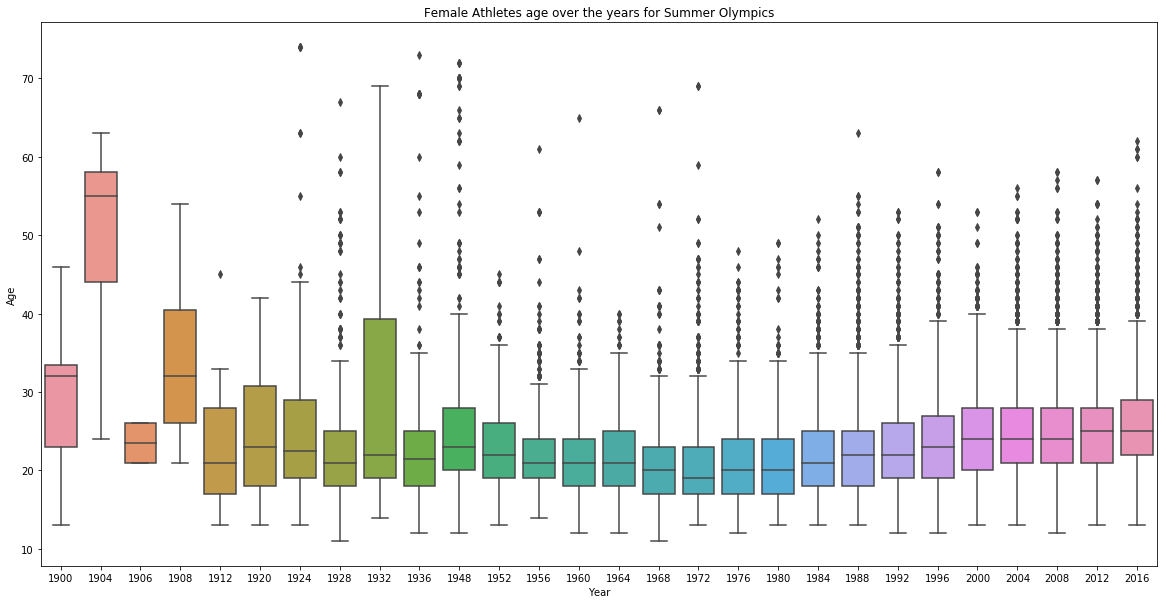

In [28]:
WVsYear = df[(df.Sex == 'F') & (df.Season == 'Summer')]
plt.figure(figsize=(20, 10))
sns.boxplot('Year', 'Age', data=WVsYear)
plt.title('Female Athletes age over the years for Summer Olympics')

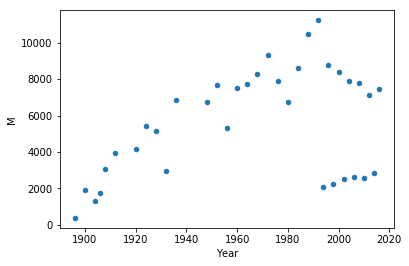

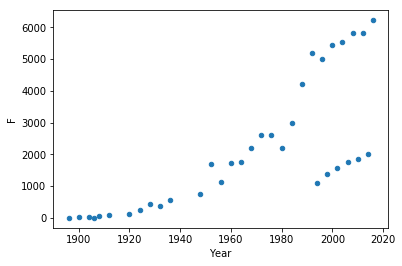

In [29]:
M,F = df.Sex.value_counts()
mp = pd.DataFrame(df.groupby('Year')['Sex'].value_counts().unstack(fill_value=0))
mp = mp.reset_index()
mp.plot(kind = "scatter", x = 'Year', y = 'M')
mp.plot(kind = "scatter", x = 'Year', y = 'F')

Text(0.5,1,'Variation of Athletes over time')

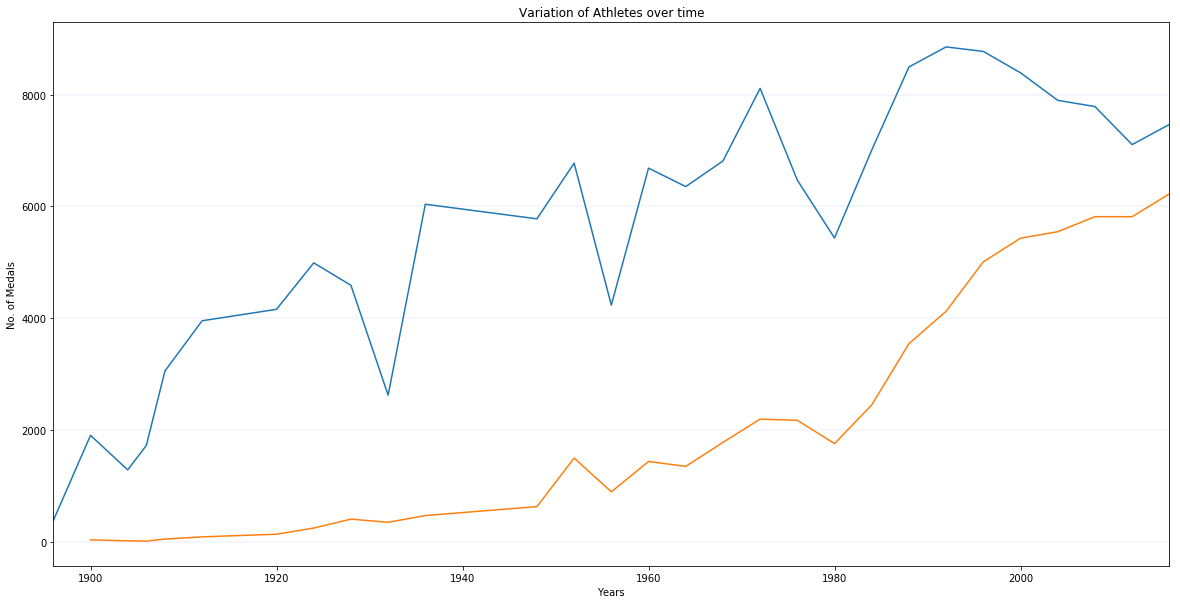

In [30]:
mpa = df[(df.Sex == 'M') & (df.Season == 'Summer')]
wpa = df[(df.Sex == 'F') & (df.Season == 'Summer')]
line = mpa.groupby('Year')['Sex'].value_counts()
line1 = wpa.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
line.loc[:,'M'].plot()
line1.loc[:,'F'].plot()
plt.xlabel("Years")
plt.ylabel("No. of Medals")
plt.grid(True,color='b', ls = '--', lw = 0.1,axis ='y')
plt.title('Variation of Athletes over time')

In [32]:
tgMedal = df[(df.Medal == 'Gold')]
tgMedal.isnull().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
dtype: bool

In [33]:
tgMedal = tgMedal[np.isfinite(tgMedal['Age'])]
print(tgMedal.shape)

(13224, 15)


Text(0.5,1,'Distribution of Gold Medals with age')

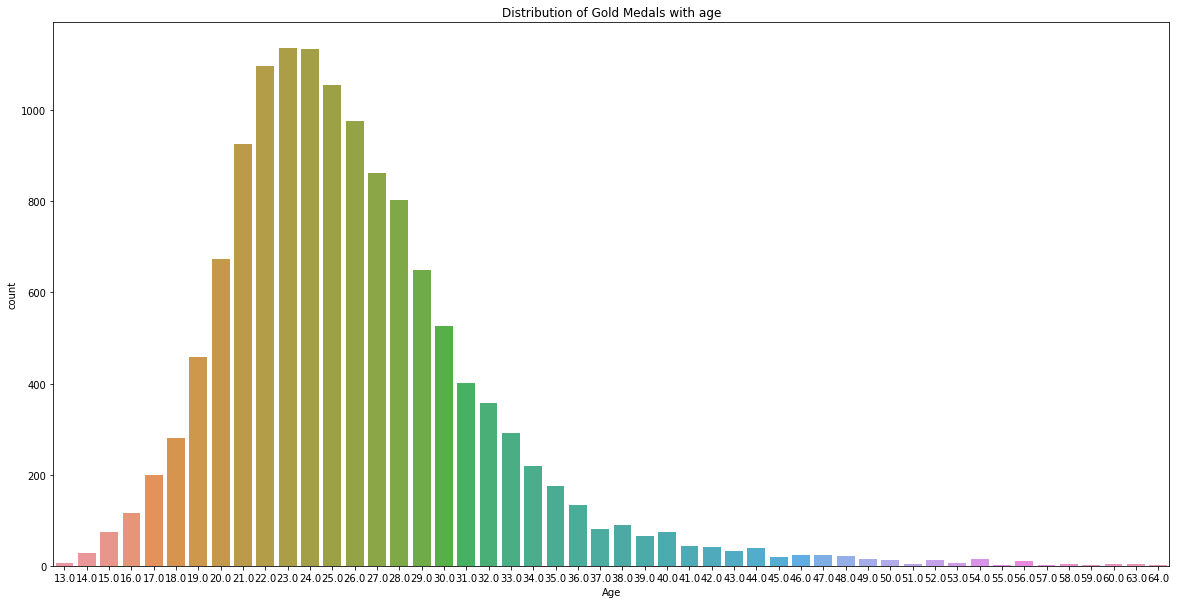

In [34]:
plt.figure(figsize=(20, 10))
sns.countplot(tgMedal['Age'])
plt.title('Distribution of Gold Medals with age')